# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [2]:
# your code here
dates = pd.date_range(start="08/01/2018", end="10/31/2018")
print(f"""
First five records: 
{dates[0:5]}

Last five records:
{dates[-5:]}
""")


First five records: 
DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05'],
              dtype='datetime64[ns]', freq='D')

Last five records:
DatetimeIndex(['2018-10-27', '2018-10-28', '2018-10-29', '2018-10-30',
               '2018-10-31'],
              dtype='datetime64[ns]', freq='D')



Generate the values for the wite noise process representing Nina's commute in August and September.

In [3]:
# your code here
mean_time = 25
std_time = 4
obs = len(dates)

commute = np.random.normal(loc=mean_time, scale=std_time, size=obs)
print(f"""
The first five records:
{commute[0:5]}
""")


The first five records:
[26.89194333 22.27429648 25.96975799 18.19705746 28.01257134]



Create a time series with the dates and the commute times.

In [4]:
# your code here
commute_series = pd.Series(data=commute, index=dates)
commute_series.head()

2018-08-01    26.891943
2018-08-02    22.274296
2018-08-03    25.969758
2018-08-04    18.197057
2018-08-05    28.012571
Freq: D, dtype: float64

Visualize the time series and set appropriate axis labels.

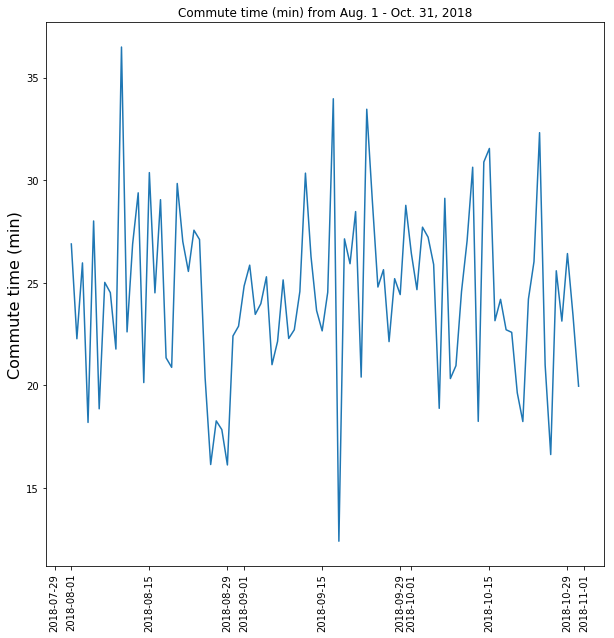

In [5]:
# your code here
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(commute_series.index, commute_series)
plt.xticks(rotation="vertical")
ax.set_ylabel("Commute time (min)", fontsize=16)
ax.set_title("Commute time (min) from Aug. 1 - Oct. 31, 2018")
plt.show()

Print Nina's shortest and longest commute.

In [6]:
commute_series.index[np.argmin(commute)]

Timestamp('2018-09-18 00:00:00', freq='D')

In [7]:
# your code here
min(commute)

12.41033391382408

In [8]:
# your code here
max(commute)

36.487277579955666

Look at the distribution of commute times.

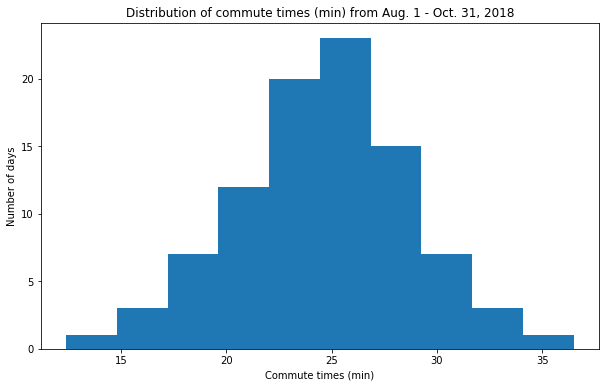

In [9]:
# your code here
plt.figure(figsize=(10, 6))
plt.hist(commute)
plt.title("Distribution of commute times (min) from Aug. 1 - Oct. 31, 2018")
plt.ylabel("Number of days")
plt.xlabel("Commute times (min)")
plt.show()

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [10]:
# your code here
commute.mean()

24.437618956728116

In [11]:
# your code here
commute.std()

4.260100091078368

Now, let's look at the mean and standard error for August and October respectively. 

In [12]:
# your code here
print(f"""
Mean commute time in August: {commute_series["2018-08-01":"2018-08-31"].mean()}

Mean commute time in October: {commute_series["2018-10-01":"2018-10-31"].mean()}
""")


Mean commute time in August: 24.010691679675514

Mean commute time in October: 24.302794208974436



Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong dependence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [20]:
np.cumsum(np.array([1, 2, 3, 4]))

array([ 1,  3,  6, 10])

In [27]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
ipo_dates = pd.date_range("2010-01-02", "2010-11-30")
ipo_mean = 0
ipo_std = 10
ipo_values = np.random.normal(loc=ipo_mean, scale=ipo_std, size=len(ipo_dates))
ipo_series = pd.Series(ipo_values, index=ipo_dates)
ipo_series.head()

2010-01-02    17.494547
2010-01-03    -2.860730
2010-01-04    -4.845651
2010-01-05   -26.533186
2010-01-06    -0.082846
Freq: D, dtype: float64

In [28]:
def random_walk(start: int, error: pd.Series) -> np.ndarray: 
    """Conduct a random walk
    
    Note: In each time period, going from left to right, the value of the variable 
          takes an independent random step up or down, a so-called random walk. 
          
          If up and down movements are equally likely at each intersection, 
          then every possible left-to-right path through the grid is 
          equally likely a priori."""
    
    cumulative_error = np.cumsum(error)
    pred = cumulative_error + start
    return pred

In [29]:
ipo_pred_series = pd.Series(random_walk(start=1000, error=ipo_values), index=ipo_dates)
ipo_pred_series.head()

2010-01-02    1017.494547
2010-01-03    1014.633817
2010-01-04    1009.788166
2010-01-05     983.254981
2010-01-06     983.172134
Freq: D, dtype: float64

Visualize the time series with correct axis labels

In [ ]:
# your code here


You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [ ]:
# keep the random seed

In [ ]:
# your code here

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

In [ ]:
# your code here

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

In [ ]:
# your code here

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!